# Classification

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("breast-cancer.csv")

In [3]:
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,M,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,M,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,M,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,M,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [4]:
dataset.shape

(569, 31)

In [5]:
dataset.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
labelencoder = LabelEncoder()
dataset['diagnosis'] = labelencoder.fit_transform(dataset['diagnosis'].values)

In [8]:
dataset.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,1,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,1,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,0,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train, test = train_test_split(dataset, test_size = 0.3)

In [11]:
X_train = train.drop('diagnosis', axis=1)
y_train = train.loc[:,'diagnosis']

In [12]:
X_test = test.drop('diagnosis', axis=1)
y_test = test.loc[:, 'diagnosis']

## LogisticRegression

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
logistic_reg = LogisticRegression()

In [15]:
logistic_reg.fit(X_train, y_train)

LogisticRegression()

In [16]:
logistic_reg_pred = logistic_reg.predict(X_test)
logistic_reg_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1])

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
confusion_matrix(y_test, logistic_reg_pred)

array([[115,   1],
       [  1,  54]], dtype=int64)

In [19]:
from sklearn.metrics import classification_report

In [20]:
print(classification_report(y_test, logistic_reg_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       116
           1       0.98      0.98      0.98        55

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



### ROC (Receiver Operating Characteristic) & AUC (Area Under the Curve)

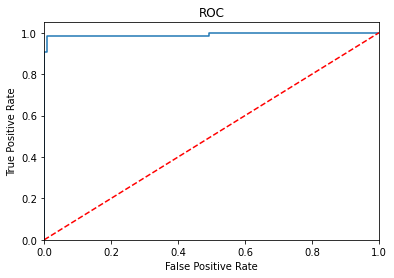

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
model_roc_auc = roc_auc_score(y_test, logistic_reg.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, logistic_reg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim(([0.0, 1.0]))
plt.ylim(([0.0, 1.05]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

## SVM 

In [22]:
from sklearn.svm import LinearSVC

In [23]:
svm = LinearSVC()

In [24]:
svm.fit(X_train, y_train)

LinearSVC()

In [25]:
svm_pred = svm.predict(X_test)
svm_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1])

In [26]:
confusion_matrix(y_test, svm_pred)

array([[115,   1],
       [  1,  54]], dtype=int64)

In [27]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       116
           1       0.98      0.98      0.98        55

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



## kNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

In [29]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [30]:
knn_pred = knn.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, knn_pred)

0.9707602339181286

In [32]:
from sklearn.model_selection import GridSearchCV

knn_tuning = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gs = GridSearchCV(knn_tuning, param_grid, cv=5)
knn_gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [33]:
print("best parameter:",knn_gs.best_params_)
print("The mean accuracy of the scores:",knn_gs.best_score_)

best parameter: {'n_neighbors': 7}
The mean accuracy of the scores: 0.9647784810126583


In [34]:
knn_ = KNeighborsClassifier(n_neighbors=3)

## Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()

In [37]:
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [38]:
naive_bayes_pred = naive_bayes.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
from sklearn.metrics import confusion_matrix

df_naive_bayes_confusion_matrix = pd.DataFrame(confusion_matrix(y_test, naive_bayes_pred), columns = ['Predicted Positive', 'Predicted Negative'], 
                  index=['Actual Positive', 'Actual Negative'])
df_naive_bayes_confusion_matrix

,Predicted Positive,Predicted Negative
Actual Positive,109,7
Actual Negative,7,48


In [41]:
print(classification_report(y_test, naive_bayes_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       116
           1       0.87      0.87      0.87        55

    accuracy                           0.92       171
   macro avg       0.91      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171

